<a href="https://colab.research.google.com/github/Unnimayav/CNN-brain-tumor-detection/blob/main/twitter_validation_nlp_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/data sets/twitter_validation.csv",names=['id','location','target','text'])
df

,id,location,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [2]:
df.isna().sum()

id          0
location    0
target      0
text        0
dtype: int64

In [3]:
df['target'].value_counts()

target
Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

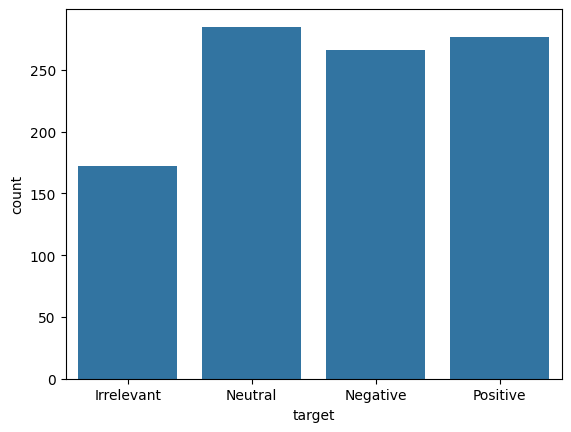

In [4]:
import seaborn as sns
sns.countplot(x='target',data=df)


In [5]:
df.drop(['id','location'],axis=1,inplace=True)

In [6]:
df

,target,text
0,Irrelevant,I mentioned on Facebook that I was struggling ...
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...
...,...,...
995,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,Positive,Today sucked so it’s time to drink wine n play...
998,Positive,Bought a fraction of Microsoft today. Small wins.


In [7]:
df=df.loc[df['target']!='Irrelevant']
df

,target,text
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...
5,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
993,Negative,Please explain how this is possible! How can t...
994,Positive,Good on Sony. As much as I want to see the new...
997,Positive,Today sucked so it’s time to drink wine n play...
998,Positive,Bought a fraction of Microsoft today. Small wins.


In [8]:
df.reset_index(drop=True,inplace=True)
df

,target,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so it’s time to drink wine n play...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [9]:
#convert target and text to numeric value
#positive=1
#neutarl=0
#negative=-1
df['target']=df['target'].map({'Positive':1,'Negative':-1,'Neutral':0})
df

<ipython-input-9-6b9b12ec03c6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target']=df['target'].map({'Positive':1,'Negative':-1,'Neutral':0})


,target,text
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so it’s time to drink wine n play...
826,1,Bought a fraction of Microsoft today. Small wins.


In [10]:
# tweets variable data is stored for text
tweets=df.text
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp I’ve had Madeleine McCann in my cel...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so it’s time to drink wine n play...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [11]:
tweets=tweets.str.replace("[^a-zA-Z0-9]+"," ")  #^=not #+=aaaa not a a a a
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp I’ve had Madeleine McCann in my cel...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so it’s time to drink wine n play...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [12]:
#stemming
from nltk.stem import SnowballStemmer
from nltk import TweetTokenizer
stemmer=SnowballStemmer('english')
tk=TweetTokenizer()



In [13]:
# x=BBC News Amazon boss Jeff Bezos rejects claims..
# x value is every single line while tokenize there will be list values from that tokens will be obtained those tokens will be stemed
# tweets=tweets.apply(lambda x:[stemmer.stem(token.lower()) for token in tk.tokenize(x)])
tweets=tweets.apply(lambda x:[stemmer.stem(token.lower())for token in tk.tokenize(x)]).apply(lambda token:" ".join(token)) #x:each line in tweets
tweets

0      bbc news - amazon boss jeff bezo reject claim ...
1      @microsoft whi do i pay for word when it funct...
2      csgo matchmak is so full of closet hack , it a...
3      now the presid is slap american in the face th...
4      hi @eahelp i ’ ve had madelein mccann in my ce...
                             ...                        
823    pleas explain how this is possibl ! how can th...
824    good on soni . as much as i want to see the ne...
825    today suck so it ’ s time to drink wine n play...
826    bought a fraction of microsoft today . small w...
827    johnson & johnson to stop sell talc babi powde...
Name: text, Length: 828, dtype: object

In [14]:
#remove stopwords
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
sw=stopwords.words('english')
sw

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
tweets=tweets.apply(lambda x:[token for token in tk.tokenize(x)if token not in sw]).apply (lambda token:" ".join(token))
tweets

0      bbc news - amazon boss jeff bezo reject claim ...
1      @microsoft whi pay word function poor @samsung...
2       csgo matchmak full closet hack , truli aw game .
3      presid slap american face realli commit unlaw ...
4      hi @eahelp ’ madelein mccann cellar past 13 ye...
                             ...                        
823    pleas explain possibl ! let compani overcharg ...
824    good soni . much want see new ps5 , go right m...
825    today suck ’ time drink wine n play borderland...
826        bought fraction microsoft today . small win .
827    johnson & johnson stop sell talc babi powder u...
Name: text, Length: 828, dtype: object

In [16]:
from numpy.lib.function_base import vectorize
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(tweets)
print(X)

  (0, 644)	0.24371149439523576
  (0, 422)	0.24371149439523576
  (0, 3598)	0.21193288837057733
  (0, 793)	0.11710011882947315
  (0, 975)	0.24371149439523576
  (0, 1107)	0.22964923721081565
  (0, 2030)	0.124059738467601
  (0, 233)	0.21193288837057733
  (0, 823)	0.16216158309067538
  (0, 766)	0.20026342771374978
  (0, 2856)	0.24371149439523576
  (0, 516)	0.24371149439523576
  (0, 1860)	0.22964923721081565
  (0, 584)	0.21193288837057733
  (0, 306)	0.1415930695027434
  (0, 2340)	0.3691755458992268
  (0, 484)	0.4592984744216313
  (1, 756)	0.4055823664694651
  (1, 2995)	0.4055823664694651
  (1, 2637)	0.3821800909185634
  (1, 1398)	0.4055823664694651
  (1, 3820)	0.36557591217188057
  (1, 2534)	0.3126902562590763
  (1, 3779)	0.26216072802580975
  (1, 2195)	0.24555654927912696
  :	:
  (825, 3512)	0.2560582225152134
  (825, 581)	0.22981061112100945
  (825, 968)	0.2315686698425631
  (825, 3501)	0.21750175079084832
  (825, 3343)	0.2904718522758868
  (825, 2600)	0.17148706662740873
  (826, 1372)	0.5

In [17]:
vectorizer.get_feature_names_out()

array(['00', '00016', '02', ..., 'zyot3flen0', 'zysola', '𝐍𝐄𝐖𝐒𝐔𝐏𝐃𝐀𝐓𝐄𝐒'],
      dtype=object)

In [18]:
X.shape

(828, 3937)

In [19]:
y=df['target'].values  #into array
y

array([ 0, -1, -1,  0, -1,  1,  1,  1, -1,  1,  1, -1,  0, -1,  1,  1, -1,
        1, -1, -1,  0, -1,  0,  0, -1, -1,  1,  1, -1,  1, -1,  0,  0,  1,
        0,  1,  0,  0,  0,  1,  0, -1, -1, -1,  0,  1, -1, -1,  1,  1,  1,
        1,  1, -1, -1,  1,  1, -1,  0, -1,  0, -1,  1, -1, -1,  1,  1,  1,
        0,  0,  0,  1,  1,  0,  1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1,
        0,  1,  0, -1,  1,  1,  0,  1,  0,  1, -1,  0,  0,  0, -1,  0, -1,
        0,  0,  1,  1,  0, -1, -1,  1, -1,  0, -1,  1,  0, -1,  0,  1,  0,
        1,  1,  0,  0,  0,  0,  1,  0,  1,  1, -1,  0,  0,  0,  0, -1,  0,
        1, -1,  0, -1,  0, -1, -1, -1,  1,  1,  1,  0,  0,  1,  0,  0,  0,
        1,  0, -1, -1,  0,  1,  1,  0,  1,  1,  0,  0, -1, -1, -1, -1,  1,
        0,  0,  1,  1,  1,  1, -1,  1,  1,  0, -1, -1, -1,  1,  1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  0, -1,  0,  0,  1, -1,  1,  1,  0,  1,
       -1, -1,  1,  1,  1,  1,  0,  0,  1, -1,  0,  1,  0, -1,  0,  0, -1,
        1,  1, -1,  0,  1

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.3)

In [21]:
#random forest
#adaboost
#svc
#knn
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier(random_state = 1)
ad = AdaBoostClassifier()
sv = SVC()
knn = KNeighborsClassifier(n_neighbors=3)

In [22]:
lst  = [rf,ad,sv,knn]
for i in lst :
  print('***********************************',i,'*****************************')
  i.fit(X_train,y_train)
  y_pred = i.predict(X_test)
  print(classification_report(y_test,y_pred))


*********************************** RandomForestClassifier(random_state=1) *****************************
              precision    recall  f1-score   support

          -1       0.48      0.78      0.59        74
           0       0.67      0.65      0.66        91
           1       0.60      0.29      0.39        84

    accuracy                           0.57       249
   macro avg       0.58      0.57      0.55       249
weighted avg       0.59      0.57      0.55       249

*********************************** AdaBoostClassifier() *****************************
              precision    recall  f1-score   support

          -1       0.39      0.64      0.48        74
           0       0.60      0.51      0.55        91
           1       0.48      0.29      0.36        84

    accuracy                           0.47       249
   macro avg       0.49      0.48      0.46       249
weighted avg       0.49      0.47      0.46       249

*********************************** SVC() ****

In [23]:
#gaussian neighbors cannot be used for sparse matrix instead use multinomial either convert matrix to array


In [24]:
y_new=rf.predict(vectorizer.transform(['bbc news amazon boss jeff bezo reject claim']))
y_new

array([-1])